# Data 620

## Week 3 Assignment: Graph Visualization

### Jimmy Ng, Corey Arnouts

In this assignment, we visualize the relationship among characters from the popular animated series, "The Simpsons". The data is collected from season 1 to season 24. We look at the core members of the show, namely the Simpson's family, i.e. Homer, Marge, Bart, List, Maggie and Granpa Simpson. We extend beyond these six characters and focus on looking at the other supporting characters that have ever engaged with them in a meaningful way at least 10 times since season 1, i.e. there must be a storyline between the characters instead of just having them appear together in the same episode.

Eventually, we have 33 characters (or nodes) from "The Simpsons" universe. In this exercise, our goal is to build a graph and identify any meaningful community within this universe. We start off in Jupyter notebook (using **networkx**), and then build a similar graph and visualize it in **gephi**.

In [1]:
%%html 
<a href="https://www.youtube.com/watch?v=MpdtzYN1cvE">Gephi Graph Visualization</a>

In [2]:
import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
import warnings

warnings.filterwarnings("ignore")

print('Python Version : ' + sys.version)
print('NetworkX version : ' + nx.__version__)

%matplotlib inline

Python Version : 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
NetworkX version : 1.11



Bad key "text.kerning_factor" on line 4 in
C:\Users\myvio\Anaconda3\envs\sps620env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Read data

In [3]:
edge = pd.read_csv("simpsons_edge.csv")
node = pd.read_csv("simpsons_node.csv")

### Edge table

In [4]:
edge.columns = ["character1", "character2", "weight"]
edge.sort_values(by = ["weight"], ascending = False)

character1                            character2  weight
0                'Marge Simpson'                       'Homer Simpson'     441
1                 'Bart Simpson'                       'Homer Simpson'     438
2                 'Lisa Simpson'                       'Homer Simpson'     402
3                 'Bart Simpson'                       'Marge Simpson'     393
4                 'Lisa Simpson'                        'Bart Simpson'     380
..                           ...                                   ...     ...
219        'Milhouse Van Houten'                     'Waylon Smithers'      10
218  'Principal Seymour Skinner'              'Santa\'s Little Helper'      10
217             'Jasper Beardly'                        'Lisa Simpson'      10
215     'Apu Nahasapeemapetilon'                      'Maggie Simpson'      10
224     'Grampa Abraham Simpson'  'Charles Montgomery \"Monty\" Burns'      10

[225 rows x 3 columns]

### Node table

In [5]:
node[node["flag"] == 1]

Id                                 label  flag gender
0    1                       'Homer Simpson'     1      m
1    2                       'Marge Simpson'     1      f
2    3                        'Bart Simpson'     1      m
3    4                        'Lisa Simpson'     1      f
4    5                      'Maggie Simpson'     1      f
5   92              'Grampa Abraham Simpson'     1      m
6    8                      'Dolph Starbeam'     1      m
7    9                         'Jimbo Jones'     1      m
8   10                    'Kearney Zzyzwicz'     1      m
9   11            'Reverend Timothy Lovejoy'     1      m
10  12              'Apu Nahasapeemapetilon'     1      m
11  13                        'Sideshow Bob'     1      m
12  21                      'Jasper Beardly'     1      m
13  27                 'Chief Clancy Wiggum'     1      m
14  29                         'Lionel Hutz'     1      m
15  30                    'Dr. Nick Riveria'     1      m
16  33                       'Patty Bouvier'     1      f
17  34                       'Selma Bouvier'     1      f
18  35  'Charles Montgomery \"Monty\" Burns'     1      m
19  36                        'Ned Flanders'     1      m
20  37                       'Todd Flanders'     1      m
21  38                       'Barney Gumble'     1      m
22  41              'Santa\'s Little Helper'     1      m
23  42           'Principal Seymour Skinner'     1      m
24  43                     'Waylon Smithers'     1      m
25  44                            'Snowball'     1      f
26  45                         'Moe Szyslak'     1      m
27  46                 'Milhouse Van Houten'     1      m
28  47                  'Jacqueline Bouvier'     1      f
29  50                       'Kent Brockman'     1      m
30  53                       'Bumblebee Man'     1      m
31  55                        'Carl Carlson'     1      m
32  58        'Superintendent Gary Chalmers'     1      m
33  60                          'Mrs. Glick'     1      f
34  66                             'Duffman'     1      m
35  70                      'The Rich Texan'     1      m
36  75        'Mayor \"Diamond Joe\" Quimby'     1      m
37  80                'Professor John Frink'     1      m
38  88                       'Gil Gunderson'     1      m
39  91                  'Itchy and Scratchy'     1      m

### Build graph

In [6]:
G = nx.Graph()

for c1, c2, w in edge.values:
    G.add_edge(c1, c2, weight = w)

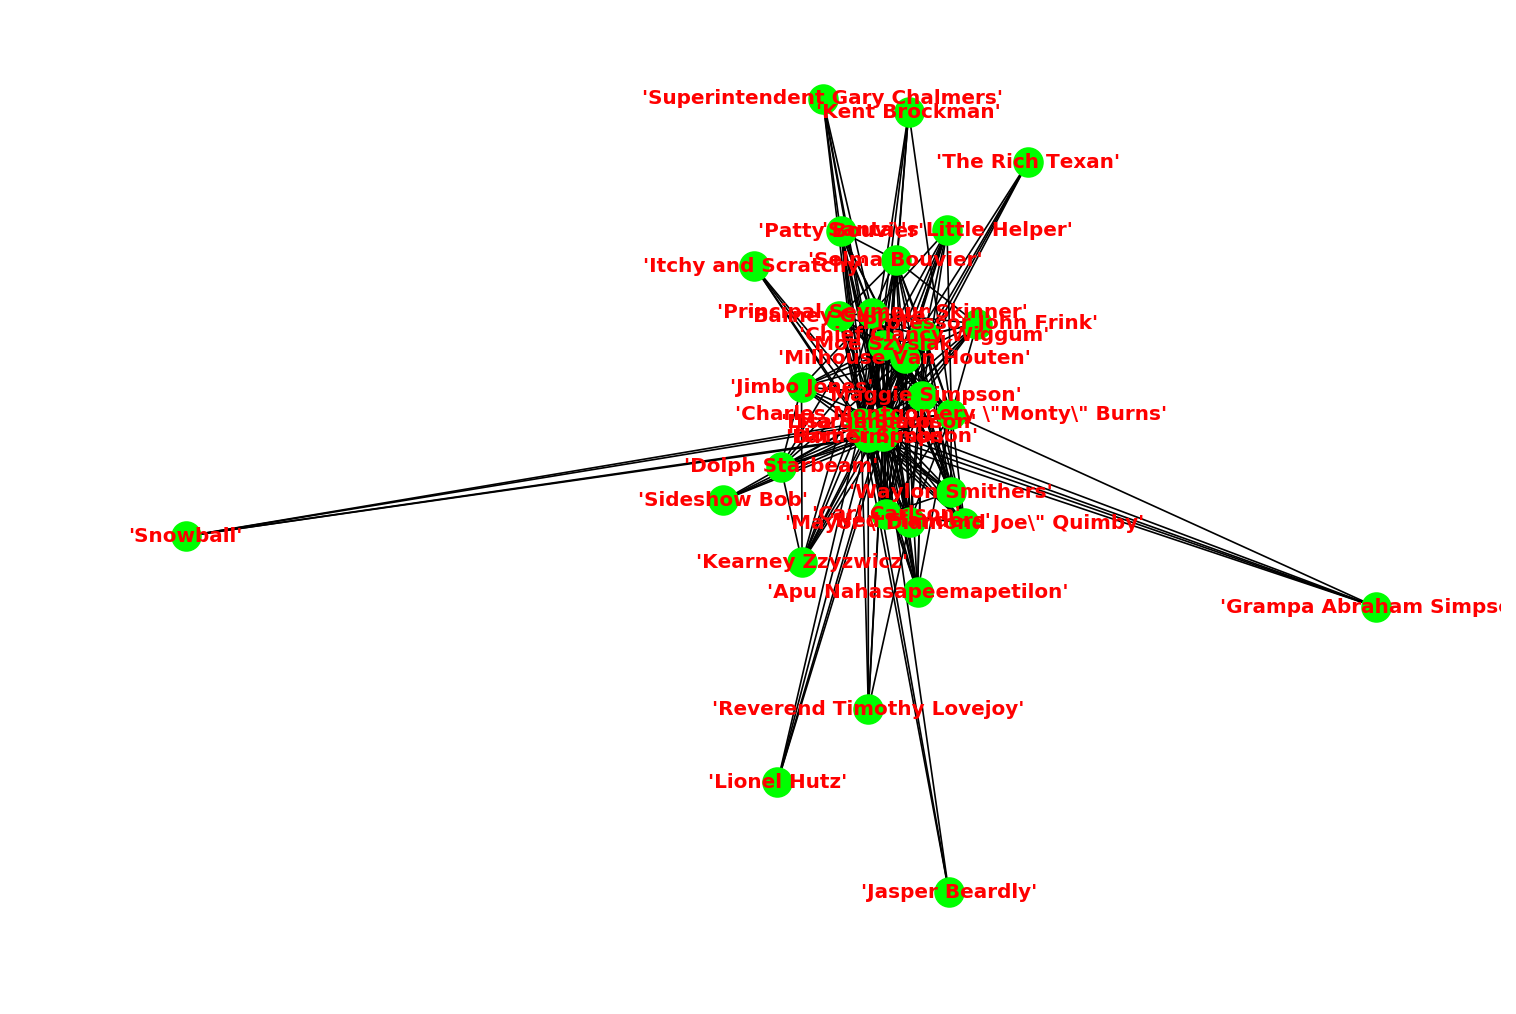

In [7]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120 
nx.draw(G, with_labels = True, font_weight = 'bold', node_color = "lime", font_color = "red")

### Diameter

In [8]:
nx.diameter(G)

2

### Min, Max degree

In [9]:
deg = nx.degree(G)
print(min(deg.values()))
print(max(deg.values()))

3
32


### Closeness centrality

In [10]:
cc = nx.closeness_centrality(G)

In [11]:
cc

{"'Marge Simpson'": 0.9696969696969697,
 "'Homer Simpson'": 1.0,
 "'Bart Simpson'": 1.0,
 "'Lisa Simpson'": 1.0,
 '\'Charles Montgomery \\"Monty\\" Burns\'': 0.7272727272727273,
 "'Milhouse Van Houten'": 0.7619047619047619,
 "'Maggie Simpson'": 0.7272727272727273,
 "'Moe Szyslak'": 0.7619047619047619,
 "'Principal Seymour Skinner'": 0.7804878048780488,
 "'Ned Flanders'": 0.64,
 "'Chief Clancy Wiggum'": 0.6956521739130435,
 "'Carl Carlson'": 0.6808510638297872,
 "'Selma Bouvier'": 0.6666666666666666,
 "'Waylon Smithers'": 0.6037735849056604,
 "'Barney Gumble'": 0.6274509803921569,
 "'Patty Bouvier'": 0.6037735849056604,
 '\'Mayor \\"Diamond Joe\\" Quimby\'': 0.6153846153846154,
 "'Apu Nahasapeemapetilon'": 0.6037735849056604,
 "'Professor John Frink'": 0.6037735849056604,
 "'Santa\\'s Little Helper'": 0.5925925925925926,
 "'Jimbo Jones'": 0.6037735849056604,
 "'Dolph Starbeam'": 0.5818181818181818,
 "'Kearney Zzyzwicz'": 0.5818181818181818,
 "'Kent Brockman'": 0.5423728813559322,
 "'Rev

### Degree centrality

In [12]:
dc = nx.degree_centrality(G)

In [13]:
dc

{"'Marge Simpson'": 0.96875,
 "'Homer Simpson'": 1.0,
 "'Bart Simpson'": 1.0,
 "'Lisa Simpson'": 1.0,
 '\'Charles Montgomery \\"Monty\\" Burns\'': 0.625,
 "'Milhouse Van Houten'": 0.6875,
 "'Maggie Simpson'": 0.625,
 "'Moe Szyslak'": 0.6875,
 "'Principal Seymour Skinner'": 0.71875,
 "'Ned Flanders'": 0.4375,
 "'Chief Clancy Wiggum'": 0.5625,
 "'Carl Carlson'": 0.53125,
 "'Selma Bouvier'": 0.5,
 "'Waylon Smithers'": 0.34375,
 "'Barney Gumble'": 0.40625,
 "'Patty Bouvier'": 0.34375,
 '\'Mayor \\"Diamond Joe\\" Quimby\'': 0.375,
 "'Apu Nahasapeemapetilon'": 0.34375,
 "'Professor John Frink'": 0.34375,
 "'Santa\\'s Little Helper'": 0.3125,
 "'Jimbo Jones'": 0.34375,
 "'Dolph Starbeam'": 0.28125,
 "'Kearney Zzyzwicz'": 0.28125,
 "'Kent Brockman'": 0.15625,
 "'Reverend Timothy Lovejoy'": 0.15625,
 "'Itchy and Scratchy'": 0.125,
 "'Grampa Abraham Simpson'": 0.15625,
 "'Superintendent Gary Chalmers'": 0.15625,
 "'Sideshow Bob'": 0.125,
 "'Snowball'": 0.125,
 "'Lionel Hutz'": 0.125,
 "'The Rich

### Betweenness centrality

In [14]:
bc = nx.betweenness_centrality(G)

In [15]:
bc

{"'Marge Simpson'": 0.11323451973653588,
 "'Homer Simpson'": 0.1327237670483638,
 "'Bart Simpson'": 0.1327237670483638,
 "'Lisa Simpson'": 0.1327237670483638,
 '\'Charles Montgomery \\"Monty\\" Burns\'': 0.016696195829260345,
 "'Milhouse Van Houten'": 0.01656113263976167,
 "'Maggie Simpson'": 0.009216662593678723,
 "'Moe Szyslak'": 0.01656113263976167,
 "'Principal Seymour Skinner'": 0.023819197155890703,
 "'Ned Flanders'": 0.003995601173020527,
 "'Chief Clancy Wiggum'": 0.005361070381231672,
 "'Carl Carlson'": 0.0036646709025741284,
 "'Selma Bouvier'": 0.0022309791463017274,
 "'Waylon Smithers'": 0.0,
 "'Barney Gumble'": 0.00036656891495601173,
 "'Patty Bouvier'": 0.0,
 '\'Mayor \\"Diamond Joe\\" Quimby\'': 0.0,
 "'Apu Nahasapeemapetilon'": 0.0,
 "'Professor John Frink'": 0.0,
 "'Santa\\'s Little Helper'": 0.0,
 "'Jimbo Jones'": 0.0010080645161290322,
 "'Dolph Starbeam'": 0.0,
 "'Kearney Zzyzwicz'": 0.0,
 "'Kent Brockman'": 0.0,
 "'Reverend Timothy Lovejoy'": 0.0,
 "'Itchy and Scratch